#Lectura y procesamiento de los resultados de los mejores modelos ELM

En el presente archivo se leen los archivos excel que contienen resumenes de los modelos generados con las grillas de ELM. Se procesa dicha información para encontrar los mejores modelos.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ELM_NARX

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ELM_NARX


In [3]:
cd resultados_grilla_ELM_NARX_2STEPS

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ELM_NARX/resultados_grilla_ELM_NARX_2STEPS


In [4]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump, load
summaryModelsELM2S = pd.read_excel('grilla_ELM_NARX_2STEPS.xlsx', header=0)

In [5]:
cd ..

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ELM_NARX


In [6]:
cd resultados_grilla_ELM_NARX_4STEPS

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ELM_NARX/resultados_grilla_ELM_NARX_4STEPS


In [7]:
summaryModelsELM4S = pd.read_excel('grilla_ELM_NARX_4STEPS.xlsx', header=0)

grilla_ELM_NARX_AQP = pd.concat([summaryModelsELM2S, summaryModelsELM4S], ignore_index=True)

In [8]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ELM_NARX


In [9]:
cd resultados_grilla_ELM_NARX_8STEPS

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ELM_NARX/resultados_grilla_ELM_NARX_8STEPS


In [10]:
summaryModelsELM8S = pd.read_excel('grilla_ELM_NARX_8STEPS.xlsx', header=0)

grilla_ELM_NARX_AQP = pd.concat([grilla_ELM_NARX_AQP, summaryModelsELM8S], ignore_index=True)

In [11]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ELM_NARX


In [12]:
cd resultados_grilla_ELM_NARX_16STEPS

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ELM_NARX/resultados_grilla_ELM_NARX_16STEPS


In [13]:
summaryModelsELM16S = pd.read_excel('grilla_ELM_NARX_16STEPS.xlsx', header=0)

grilla_ELM_NARX_AQP = pd.concat([grilla_ELM_NARX_AQP, summaryModelsELM16S], ignore_index=True)

In [14]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ELM_NARX


In [15]:
cd resultados_grilla_ELM_NARX_24STEPS

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ELM_NARX/resultados_grilla_ELM_NARX_24STEPS


In [16]:
summaryModelsELM24S = pd.read_excel('grilla_ELM_NARX_24STEPS.xlsx', header=0)

grilla_ELM_NARX_AQP = pd.concat([grilla_ELM_NARX_AQP, summaryModelsELM24S], ignore_index=True)
grilla_ELM_NARX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAE                     70 non-null     float64
 1   delayedSteps            70 non-null     int64  
 2   nameModel               70 non-null     object 
 3   nameConfiguration       70 non-null     object 
 4   timeTrain (in seconds)  70 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.9+ KB


##La cantidad de modelos generados para el ELM NARX de AQP fue de 70

In [17]:
rslt_df = grilla_ELM_NARX_AQP.sort_values('MAE')
total = grilla_ELM_NARX_AQP['timeTrain (in seconds)'].sum()
print("Total time: " + str(total))
grilla_ELM_NARX_AQP.describe()

Total time: 1848.6699999999998


MAE  delayedSteps  timeTrain (in seconds)
count  70.000000     70.000000               70.000000
mean    0.407311     10.800000               26.409571
std     0.091737      8.217338               49.078655
min     0.325017      2.000000                0.030000
25%     0.340241      4.000000                0.170000
50%     0.368597      8.000000                2.650000
75%     0.450521     16.000000               29.152500
max     0.748649     24.000000              157.590000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 1848, lo que equivale a media hora aproximadamente. Además se tienen las estadisticas resumen.

In [18]:
rslt_df.iloc[:10,:]

MAE  ...  timeTrain (in seconds)
44  0.325017  ...                    0.16
0   0.325547  ...                    0.06
3   0.328635  ...                    0.14
42  0.329444  ...                    0.09
29  0.331422  ...                    0.04
19  0.331780  ...                    0.34
45  0.331863  ...                    0.16
30  0.335212  ...                    0.15
43  0.335215  ...                    0.05
59  0.336135  ...                    0.20

[10 rows x 5 columns]

In [19]:
rslt_df.iloc[1,:]

MAE                                            0.325547
delayedSteps                                          2
nameModel                     ELM_92_1_10_mse_2S.joblib
nameConfiguration         ELM_92_1_10_mse_2S_config.npy
timeTrain (in seconds)                             0.06
Name: 0, dtype: object

##Por principio de parsimonia, se decide trabajar con un modelo que genera un MAE de 0.32, pero que tiene pocos retardos, especificamente 2 retardos.

In [20]:
bestModel = rslt_df.iloc[1,:]
print(bestModel)

MAE                                            0.325547
delayedSteps                                          2
nameModel                     ELM_92_1_10_mse_2S.joblib
nameConfiguration         ELM_92_1_10_mse_2S_config.npy
timeTrain (in seconds)                             0.06
Name: 0, dtype: object


In [21]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ELM_NARX


In [22]:
cd resultados_grilla_ELM_NARX_2STEPS

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ELM_NARX/resultados_grilla_ELM_NARX_2STEPS


In [23]:
import time


def _mean_squared_error(y, pred):
    return 0.5 * np.mean((y - pred) ** 2)


def _mean_abs_error(y, pred):
    return np.mean(np.abs(y - pred))


def _sigmoid(x):
    return 1. / (1. + np.exp(-x))


def _identity(x):
    return x



def getActivation(name):
    return {
        'sigmoid': _sigmoid
    }[name]


def getLoss(name):
    return {
        'mse': _mean_squared_error,
        'mae': _mean_abs_error
    }[name]


class ELM:
    def __init__(self, num_input_nodes, num_hidden_units, num_out_units, activation='sigmoid',
                 loss='mse', beta_init=None, w_init=None, bias_init=None):
        self._num_input_nodes = num_input_nodes
        self._num_hidden_units = num_hidden_units
        self._num_out_units = num_out_units

        self._activation = getActivation(activation)
        self._loss = getLoss(loss)

        if isinstance(beta_init, np.ndarray):
            self._beta = beta_init
        else:
            self._beta = np.random.uniform(-1., 1., size=(self._num_hidden_units, self._num_out_units))

        if isinstance(w_init, np.ndarray):
            self._w = w_init
        else:
            self._w = np.random.uniform(-1, 1, size=(self._num_input_nodes, self._num_hidden_units))

        if isinstance(bias_init, np.ndarray):
            self._bias = bias_init
        else:
            self._bias = np.zeros(shape=(self._num_hidden_units,))

        #print('Bias shape:', self._bias.shape)
        #print('W shape:', self._w.shape)
        #print('Beta shape:', self._beta.shape)

    def fit(self, X, Y, display_time=False):
        H = self._activation(X.dot(self._w) + self._bias)

        # Moore–Penrose pseudo inverse
        if display_time:
            start = time.time()
        H_pinv = np.linalg.pinv(H)
        if display_time:
            stop = time.time()
            print(f'Train time: {stop-start}')

        self._beta = H_pinv.dot(Y)

        # print('Fit Beta shape:', self._beta.shape)

    def __call__(self, X):
        H = self._activation(X.dot(self._w) + self._bias)
        return H.dot(self._beta)

    def evaluate(self, X, Y):
        pred = self(X)

        # Loss (base on model setting)
        loss = self._loss(Y, pred)

        # Accuracy
        #acc = np.sum(np.argmax(pred, axis=-1) == np.argmax(Y, axis=-1)) / len(Y)

        # Unweighted Average Recall
        # TODO

        #return loss, acc, pred
        return loss, pred

In [24]:
#para recuperar configDict
config=np.load(bestModel['nameConfiguration'],allow_pickle='TRUE').item()
print(config)

#Para cargar modelo:
saved_model = load(bestModel['nameModel']) 

{'nInputs': 92, 'nOutputs': 1, 'nHiddenUnits': 10, 'Loss': 'mse', 'Delays': 2, 'PredictionHorizon': 24}


In [25]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ELM_NARX


In [26]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX


In [27]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos


In [28]:
cd Data_AQP

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/Data_AQP


In [31]:
def cargarData1():
  trainDFScaled = pd.read_csv('trainScaledDF.csv', header=0)
  testDFScaled = pd.read_csv('testScaledDF.csv', header=0)
  trainDF = pd.read_csv('trainDF.csv', header=0)
  testDF = pd.read_csv('testDF.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 45):
  cont = 0
  X = list()
  y = list()

  #Se va a iterar para cada fragmento de datos
  values = data.values
  chunk_ids = np.unique(values[:, 0])
  for chunk_id in chunk_ids:
    rows = data.loc[(data['chunkID'] == chunk_id)]
    #print(rows)
    cantidadFilas = rows.shape[0]
    indexAux = 0
    indexTarget = 0
    for _, row in rows.iterrows():
      end_row = indexAux + delays
      indexTarget = end_row - 1 + predictionHorizon
      if indexTarget <= cantidadFilas-1:
        salidaAux = rows.iloc[indexTarget, columnTarget]
        xAux = rows.iloc[indexAux:end_row, :].values
        #print(xAux.shape)
        #print(xAux)
        X.append(xAux)
        y.append(salidaAux)
        #print(salidaAux)
      indexAux = indexAux + 1
    cont = cont + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY


def reshapeXdata(trainXScaled, testXScaled):
  #reshape data
  trainXScaled = trainXScaled.reshape((trainXScaled.shape[0],trainXScaled.shape[1]*trainXScaled.shape[2]))
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  testXScaled = testXScaled.reshape((testXScaled.shape[0],testXScaled.shape[1]*testXScaled.shape[2]))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  return trainXScaled, testXScaled

# calculate the error between an actual and predicted value
def calculate_error(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)

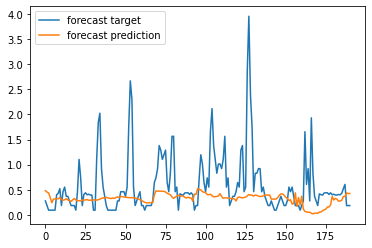

In [33]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 24, trainDFScaled, testDFScaled, trainDF, testDF)
trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:191]
val_loss, validation_predictions = saved_model.evaluate(testXScaled[:191,:], validation_target)

fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()


##Generar data para NARMAX

In [39]:
def generateNarmaxData(dataScaled, data, delays, predictionHorizon, saved_model, columnTarget = 45):
  cont = 0
  X = list()
  y = list()
  #Se hace una copia de los datos de entrada y agrega una columna con NA para los errores
  dataNarmax = data.copy()
  dataNarmax["error"] = np.nan
  dataNarmaxScaled = dataScaled.copy()
  dataNarmaxScaled["error"] = np.nan

  #Se va a iterar para cada fragmento de datos
  values = data.values
  chunk_ids = np.unique(values[:, 0])
  valuesScaled = dataScaled.values
  chunk_idsS = np.unique(valuesScaled[:, 0])

  for i in range(chunk_ids.shape[0]):
    #if cont == 1:
      #break
    rows = data.loc[(data['chunkID'] == chunk_ids[i])]
    rowsScaled = dataScaled.loc[(dataScaled['chunkID'] == chunk_idsS[i])]
    cantidadFilas = rows.shape[0]
    indexAux = 0
    indexTarget = 0
    contInterno = 0
    for _, row in rows.iterrows():
      #if contInterno == 1:
        #break
      end_row = indexAux + delays
      indexTarget = end_row - 1 + predictionHorizon
      if indexTarget <= cantidadFilas-1:
        #Se agrega la salida esperada sin escalar
        salidaAux = rows.iloc[indexTarget, columnTarget]
        #y.append(salidaAux)
        xAux = rowsScaled.iloc[indexAux:end_row, :].values
        xAux = xAux.reshape(xAux.shape[0]*xAux.shape[1])
        #print(type(xAux))
        #print(xAux.shape)
        #print(xAux)
        #X.append(xAux)
        loss, prediction = saved_model.evaluate(xAux, salidaAux)
        #print(type(prediction))
        #print(type(salidaAux))
        error = calculate_error(salidaAux, prediction)
        posicionS = rowsScaled.iloc[indexTarget, 1]
        posicion = rows.iloc[indexTarget, 1]
        #print("Posicion: " + str(posicion))
        #print("Prediction: " + str(prediction))
        #print("salidaAux: " + str(salidaAux))
        #print("Error: " + str(error))
        dataNarmaxScaled.loc[(dataNarmaxScaled['chunkID'] == chunk_idsS[i]) & (dataNarmaxScaled['position_within_chunk'] == posicionS), 'error'] = error
        dataNarmax.loc[(dataNarmax['chunkID'] == chunk_ids[i]) & (dataNarmax['position_within_chunk'] == posicion), 'error'] = error
      contInterno = contInterno + 1  
      indexAux = indexAux + 1
    cont = cont + 1
  
  dataNarmax = dataNarmax.dropna()
  dataNarmaxScaled = dataNarmaxScaled.dropna()
  return dataNarmax, dataNarmaxScaled


In [40]:
dataTrainNarmax, dataTrainNarmaxScaled = generateNarmaxData(trainDFScaled, trainDF, bestModel['delayedSteps'], 24, saved_model)
dataTestNarmax, dataTestNarmaxScaled = generateNarmaxData(testDFScaled, testDF, bestModel['delayedSteps'], 24, saved_model)

In [46]:
dataTrainNarmax.to_csv('dataTrainNarmaxELM.csv', index = False)
dataTrainNarmaxScaled.to_csv('dataTrainNarmaxScaledELM.csv', index = False)
dataTestNarmax.to_csv('dataTestNarmaxELM.csv', index = False)
dataTestNarmaxScaled.to_csv('dataTestNarmaxScaledELM.csv', index = False)

In [41]:
dataTrainNarmax.iloc[:50,[0,1,45,46]]

chunkID  position_within_chunk  target_4_1601     error
25      1.0                   26.0       0.092022  0.300873
26      1.0                   27.0       0.092022  0.323924
27      1.0                   28.0       0.092022  0.295583
28      1.0                   29.0       0.092022  0.335163
29      1.0                   30.0       0.092022  0.320259
30      1.0                   31.0       0.092022  0.285372
31      1.0                   32.0       0.092022  0.301375
32      1.0                   33.0       0.092022  0.255443
33      1.0                   34.0       0.184045  0.181806
34      1.0                   35.0       0.276067  0.086184
35      1.0                   36.0       0.606164  0.196657
36      1.0                   37.0       0.663358  0.281830
37      1.0                   38.0       0.644848  0.270837
38      1.0                   39.0       1.104268  0.722435
39      1.0                   40.0       0.736179  0.363185
40      1.0                   41.0       0.184045  0.196344
41      1.0                   42.0       0.092022  0.295435
42      1.0                   43.0       0.092022  0.301414
43      1.0                   44.0       0.552134  0.150656
44      1.0                   45.0       0.920223  0.528432
45      1.0                   46.0       0.552134  0.170482
46      1.0                   47.0       0.276067  0.065323
47      1.0                   48.0       0.092022  0.241149
48      1.0                   49.0       0.439351  0.123419
49      1.0                   50.0       0.092022  0.217938
50      1.0                   51.0       0.092022  0.217151
51      1.0                   52.0       0.184045  0.271122
52      1.0                   53.0       0.092022  0.424794
53      1.0                   54.0       0.092022  0.404587
54      1.0                   55.0       0.092022  0.422573
55      1.0                   56.0       0.092022  0.410768
56      1.0                   57.0       0.184045  0.314726
57      1.0                   58.0       0.920223  0.408678
58      1.0                   59.0       0.736179  0.227286
59      1.0                   60.0       1.196290  0.717628
60      1.0                   61.0       1.748424  1.269531
61      1.0                   62.0       3.496849  3.008714
62      1.0                   63.0       2.024491  1.517067
63      1.0                   64.0       1.104268  0.609980
64      1.0                   65.0       0.736179  0.277503
65      1.0                   66.0       0.828201  0.365172
66      1.0                   67.0       0.368089  0.092469
67      1.0                   68.0       0.368089  0.105034
68      1.0                   69.0       0.184045  0.295116
69      1.0                   70.0       0.184045  0.297125
70      1.0                   71.0       0.184045  0.288396
71      1.0                   72.0       0.184045  0.286412
72      1.0                   73.0       0.368089  0.119695
73      1.0                   74.0       0.368089  0.154196
74      1.0                   75.0       0.368089  0.180431

In [43]:
dataTrainNarmaxScaled.iloc[:50,[0,1,45,46]]

chunkID  position_within_chunk  target_4_1601     error
25 -1.722304              -1.271992      -0.592938  0.300873
26 -1.722304              -1.253950      -0.592938  0.323924
27 -1.722304              -1.235907      -0.592938  0.295583
28 -1.722304              -1.217865      -0.592938  0.335163
29 -1.722304              -1.199822      -0.592938  0.320259
30 -1.722304              -1.181780      -0.592938  0.285372
31 -1.722304              -1.163737      -0.592938  0.301375
32 -1.722304              -1.145695      -0.592938  0.255443
33 -1.722304              -1.127653      -0.448674  0.181806
34 -1.722304              -1.109610      -0.304411  0.086184
35 -1.722304              -1.091568       0.213085  0.196657
36 -1.722304              -1.073525       0.302748  0.281830
37 -1.722304              -1.055483       0.273729  0.270837
38 -1.722304              -1.037440       0.993965  0.722435
39 -1.722304              -1.019398       0.416909  0.363185
40 -1.722304              -1.001355      -0.448674  0.196344
41 -1.722304              -0.983313      -0.592938  0.295435
42 -1.722304              -0.965271      -0.592938  0.301414
43 -1.722304              -0.947228       0.128381  0.150656
44 -1.722304              -0.929186       0.705437  0.528432
45 -1.722304              -0.911143       0.128381  0.170482
46 -1.722304              -0.893101      -0.304411  0.065323
47 -1.722304              -0.875058      -0.592938  0.241149
48 -1.722304              -0.857016      -0.048429  0.123419
49 -1.722304              -0.838973      -0.592938  0.217938
50 -1.722304              -0.820931      -0.592938  0.217151
51 -1.722304              -0.802889      -0.448674  0.271122
52 -1.722304              -0.784846      -0.592938  0.424794
53 -1.722304              -0.766804      -0.592938  0.404587
54 -1.722304              -0.748761      -0.592938  0.422573
55 -1.722304              -0.730719      -0.592938  0.410768
56 -1.722304              -0.712676      -0.448674  0.314726
57 -1.722304              -0.694634       0.705437  0.408678
58 -1.722304              -0.676592       0.416909  0.227286
59 -1.722304              -0.658549       1.138229  0.717628
60 -1.722304              -0.640507       2.003813  1.269531
61 -1.722304              -0.622464       4.744828  3.008714
62 -1.722304              -0.604422       2.436605  1.517067
63 -1.722304              -0.586379       0.993965  0.609980
64 -1.722304              -0.568337       0.416909  0.277503
65 -1.722304              -0.550294       0.561173  0.365172
66 -1.722304              -0.532252      -0.160147  0.092469
67 -1.722304              -0.514210      -0.160147  0.105034
68 -1.722304              -0.496167      -0.448674  0.295116
69 -1.722304              -0.478125      -0.448674  0.297125
70 -1.722304              -0.460082      -0.448674  0.288396
71 -1.722304              -0.442040      -0.448674  0.286412
72 -1.722304              -0.423997      -0.160147  0.119695
73 -1.722304              -0.405955      -0.160147  0.154196
74 -1.722304              -0.387912      -0.160147  0.180431

In [42]:
dataTestNarmax.iloc[:50,[0,1,45,46]]

chunkID  position_within_chunk  target_4_1601     error
25      1.0                  146.0       0.276067  0.205232
26      1.0                  147.0       0.184045  0.268019
27      1.0                  148.0       0.092022  0.344514
28      1.0                  149.0       0.092022  0.250771
29      1.0                  150.0       0.092022  0.148196
30      1.0                  151.0       0.092022  0.219749
31      1.0                  152.0       0.092022  0.222415
32      1.0                  153.0       0.398325  0.076020
33      1.0                  154.0       0.428488  0.110962
34      1.0                  155.0       0.520786  0.175317
35      1.0                  156.0       0.184045  0.121102
36      1.0                  157.0       0.460112  0.170417
37      1.0                  158.0       0.552134  0.252260
38      1.0                  159.0       0.368089  0.048043
39      1.0                  160.0       0.368089  0.073103
40      1.0                  161.0       0.276067  0.006563
41      1.0                  162.0       0.184045  0.084645
42      1.0                  163.0       0.184045  0.113730
43      1.0                  164.0       0.184045  0.140334
44      1.0                  165.0       0.092022  0.202811
45      1.0                  166.0       0.460112  0.179609
46      1.0                  167.0       1.104268  0.822376
47      1.0                  168.0       0.736179  0.464048
48      1.0                  169.0       0.184045  0.111518
49      1.0                  170.0       0.405162  0.115062
50      1.0                  171.0       0.438234  0.142404
51      1.0                  172.0       0.399484  0.095891
52      1.0                  173.0       0.409662  0.119702
53      1.0                  174.0       0.393647  0.101460
54      1.0                  175.0       0.393286  0.106451
55      1.0                  176.0       0.092022  0.207219
56      1.0                  177.0       0.092022  0.201267
57      1.0                  178.0       1.104268  0.810346
58      1.0                  179.0       1.840447  1.541621
59      1.0                  180.0       2.024491  1.711171
60      1.0                  181.0       0.920223  0.593094
61      1.0                  182.0       0.552134  0.211758
62      1.0                  183.0       0.368089  0.037817
63      1.0                  184.0       0.184045  0.163865
64      1.0                  185.0       0.092022  0.243657
65      1.0                  186.0       0.092022  0.237705
66      1.0                  187.0       0.092022  0.231951
67      1.0                  188.0       0.092022  0.243594
68      1.0                  189.0       0.092022  0.234260
69      1.0                  190.0       0.092022  0.249332
70      1.0                  191.0       0.276067  0.081767
71      1.0                  192.0       0.276067  0.067551
97      2.0                  146.0       0.460112  0.097086
98      2.0                  147.0       0.460112  0.097598
99      2.0                  148.0       0.460112  0.106444

In [44]:
print("trainDFScaled.shape = " + str(trainDFScaled.shape))
print("trainDF.shape = " + str(trainDF.shape))
print("testDFScaled.shape = " + str(testDFScaled.shape))
print("testDF.shape = " + str(testDF.shape))
#print("trainXScaled.shape = " + str(trainXScaled.shape))
#print("trainY.shape = " + str(trainY.shape))

trainDFScaled.shape = (24600, 46)
trainDF.shape = (24600, 46)
testDFScaled.shape = (14760, 46)
testDF.shape = (14760, 46)


In [45]:
print("dataTrainNarmax.shape = " + str(dataTrainNarmax.shape))
print("dataTrainNarmaxScaled.shape = " + str(dataTrainNarmaxScaled.shape))
print("dataTestNarmax.shape = " + str(dataTestNarmax.shape))
print("dataTestNarmaxScaled.shape = " + str(dataTestNarmaxScaled.shape))

dataTrainNarmax.shape = (19475, 47)
dataTrainNarmaxScaled.shape = (19475, 47)
dataTestNarmax.shape = (9635, 47)
dataTestNarmaxScaled.shape = (9635, 47)
